In [62]:
!pip install xgboost -q

In [63]:
!pip install catboost -q

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [65]:
df=sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
#split the data into train and test
X=df.drop('species',axis=1)
y=df['species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [67]:
#train the dicision tree model
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [68]:
#train the random forest model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [69]:
#encode the target variable
le=LabelEncoder()
y=le.fit_transform(y)

#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
#train the xgboost model
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.91      0.83      0.87        12
           2       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30

0.9
[[ 9  0  0]
 [ 1 10  1]
 [ 0  1  8]]


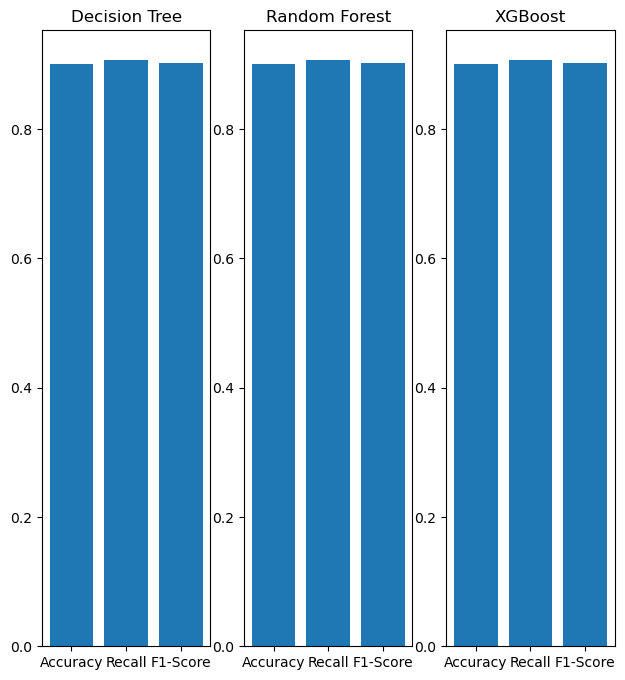

In [76]:
#make a bar plot making each of the matrix with respect to model
plt.figure(figsize=(10,8))
plt.subplot(1,4,1)
plt.bar(['Accuracy','Recall','F1-Score'],[accuracy_score(y_test,y_pred),recall_score(y_test,y_pred,average='macro'),f1_score(y_test,y_pred,average='macro')])
plt.title('Decision Tree')

plt.subplot(1,4,2)
plt.bar(['Accuracy','Recall','F1-Score'],[accuracy_score(y_test,y_pred),recall_score(y_test,y_pred,average='macro'),f1_score(y_test,y_pred,average='macro')])
plt.title('Random Forest')

plt.subplot(1,4,3)
plt.bar(['Accuracy','Recall','F1-Score'],[accuracy_score(y_test,y_pred),recall_score(y_test,y_pred,average='macro'),f1_score(y_test,y_pred,average='macro')])
plt.title('XGBoost')

plt.show()